![HEAD](https://gistcdn.githack.com/Gbecdox/26d1595c87bb09f53ef9fb4b8fb48849/raw/9b50282b44a15bf95dbffa6f44346865427f4fd7/HeaderPERCEP.svg)

#  Introdução

Nesse notebook trabalharemos:

* Separação linear, ideia intuitiva e definição formal.
* Estrutura ("organização interna") e mecanismo de aprendizado do *perceptron*.
* Aplicação do modelo e visualização dos resultados, ambas por meio de bibliotecas auxiliares.
* Diferenciações do modelo ao longo do tempo.

Para o entendimento do conteúdo, recomenda-se, além de uma noção básica das "bibliotecas fundamentais", algum entendimento de Geometria Analítica (essencialmente, vetores e produto escalar). Abaixo, importaremos as bibliotecas que serão utilizadas ao longo do notebook como um todo, reservando a importação das demais para o momento de seu uso.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set() # Garante a exibição dos plots com a aparência padrão da biblioteca Seaborn.

# Perceptron

O *perceptron* é um algoritmo que, através de aprendizado supervisionado, atua como um classificador binário (dada uma regra — um método de separação — agrupam-se os dados em dois conjuntos). Mais especificamente, o *perceptron* é ideal para ser utilizado quando os agrupamentos são **linearmente separáveis**.

## Separação linear

<img align="left" width="500" src="https://i.ibb.co/3hzCqzX/Gr-ficos.png">

De forma direta e ilustrativa, no **Gráfico 1** temos pelo menos uma reta que sozinha separa satisfatoriamente os dois tipos de marcadores (portanto, temos conjuntos linearmente separáveis); já no **Gráfico 2** isso não ocorre (portanto, da forma como estão dispostos, os conjuntos não são linearmente separáveis). Vale ressaltar que o caso anterior é, na verdade, uma simplificação bidimensional do problema: ainda que rapidamente, veremos  que a separação linear é um conceito que não se limita aos espaços bidimensionais.

### Um aprofundamento

Possuímos algumas alternativas para definir formalmente a separação linear, note que embora não seja imprescindível compreender esses pormenores, entedê-los nos ajuda a pensar além do caso particular (citado a cima). Vejamos a primeira definição:

> Dois conjuntos $X_0,\ X_1 \subset \mathbb{R}^n$ são linearmente separáveis se existir pelo menos um hiperplano que os separem.

Não complicaremos ainda mais as coisas, mas um [hiperplano](https://en.wikipedia.org/wiki/Hyperplane) é, basicamente, um subespaço que possui uma dimenção a menos do que o espaço no qual ele se encontra. Ou seja, assim como a reta é o hiperplano que separava os marcadores a cima, o plano da figura abaixo é o hiperplano que separa os pontos no espaço tridimensional.

<img align="left" width="250" src="https://i.ibb.co/K57b4R6/Linear-Separability.png">

***
**Observação:** no campo de *machine learning*, chamamos esse lugar geométrico de ***decision boundary***. Ele é o responsável pela fragmentação do espaço em duas regiões, cada qual representativa de uma classe.
***

Equivalentemente, mas agora de forma algébrica, temos:

> Dois conjuntos $X_0,\ X_1 \subset \mathbb{R}^n$ são linearmente separáveis se existirem $w \in \mathbb{R}^n$ e $k \in \mathbb{R}$ tais que:
>
> $\forall x \in X_0:\ x^T \cdot w < k$ <br>
> $\forall x \in X_1:\ x^T \cdot w > k$

Na qual "$\cdot$" denota o produto escalar e "$x^T$" um vetor linha (a transposição de um vetor coluna). Embora possa parecer sobremaneira sofisticada, essa segunda forma simplifica muito as coisas, pois remove a necessidade de um recurso visual (e.g. um plano ou uma reta). Vamos criar um exemplo abaixo caso você queira entender a fórmula na prática.

**Exemplo**

Começaremos visualizando dois conjuntos linearmente separáveis em um gráfico, no nosso caso fictício: o número de horas estudadas pela nota obtida em uma prova para duas turmas de alunos (**A** e **B**). Vejamos:

Text(3.5, 3.5, 'Turma B')

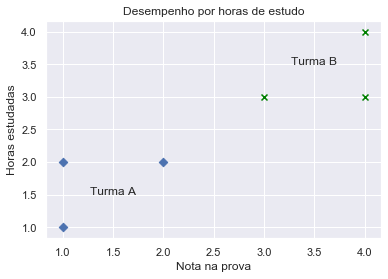

In [3]:
plt.scatter([1, 1, 2], [1, 2, 2], marker="D")                # Plota três pontos com o marcador 'diamante' na cor padrão (Turma A).
plt.scatter([3, 4, 4], [3, 3, 4], color="green", marker="x") # Plota três pontos com o marcador 'X' na cor verde (Truma B).

plt.title("Desempenho por horas de estudo") # Título do gráfico.
plt.xlabel("Nota na prova")                 # Legenda do eixo x.
plt.ylabel("Horas estudadas")               # Legenda do eixo y.

plt.text(1.5, 1.5, "Turma A", ha="center") # Escreve 'Turma A' centralizado em (1.5,1.5).
plt.text(3.5, 3.5, "Turma B", ha="center") # Escreve 'Turma B' centralizado em (3.5,3.5).

Apesar da figura a cima, nosso objetivo é provar algebricamente a separação linear. Assim sendo, agora que temos os *data points* de forma clara, conseguiremos determinar os vetores facilmente, a começar por **A**:

$a_1 = [1,\ 1]$ <br>
$a_2 = [1,\ 2]$ <br>
$a_3 = [2,\ 2]$

E, em seguida, **B**:

$b_1 = [3,\ 3]$ <br>
$b_2 = [4,\ 3]$ <br>
$b_3 = [4,\ 4]$

Como nosso *dataset* é extremamente simples, não precisaremos de nada elaborado para o vetor $w$. Na verdade, se por hipótese fizermos $w = [1, 1]$ bastaria provar que $k$ existe e é um número real para comprovarmos que os dados são linearmente separáveis. Bom, vamos fazer isso:

$a_1 \cdot w = 1 + 1 = 2$ <br>
$a_2 \cdot w = 1 + 2 = 3$ <br>
$a_3 \cdot w = 2 + 2 = 4$

$b_1 \cdot w = 3 + 3 = 6$ <br>
$b_2 \cdot w = 4 + 3 = 7$ <br>
$b_3 \cdot w = 4 + 4 = 8$

Como já sabemos, $k$ deve ser maior do que todos os produtos escalares para o conjunto **A**, e menor do que todos eles para o conjunto **B**, portanto:

$4 < k <6$

Pronto! Dessa forma comprovamos algebricamente que **A** e **B** são dois conjuntos linearmente separáveis. Por fim, perceba apenas que seguimos esse caminho (determinar um $w$ qualquer e verificar se para ele existia um $k$) por uma mera escolha pessoal.

## Estrutura

Apresentamos aqui a separação linear pois ela introduz conceitos importantes para o entendimento de modelos complexos, sendo a base do funcionamento de um *perceptron*, como já citado. Mas como sabemos que você não necessariamente está habituado(a) ao produto escalar, passaremos a ver o processo sob uma nova e equivalente óptica: a do somatório. Podemos reescrever a definição anterior como:

> Dois conjuntos $X_0,\ X_1 \subset \mathbb{R}^n$ são linearmente separáveis se existirem $w \in \mathbb{R}^n$ e $k \in \mathbb{R}$ tais que:
>
> $\displaystyle \forall x \in X_0: \sum_{i=1}^n w_ix_i < k$
>
> $\displaystyle \forall x \in X_1: \sum_{i=1}^n w_ix_i > k$
>
> Na qual $w_i$ e $x_i$ são a $i$-ésima componente de, respectivamente, $w$ e $x$.

O que fizemos aqui foi simplesmente desenvolver o produto escalar para dois vetores genéricos: $w = [w_1,\ w_2,\ ...,\ w_n]$ e $x = [x_1,\ x_2,\ ...,\ x_n]$, por outros termos, multiplicamos a primeira componente de $w$ pela primeira componente de $x$ (tem-se $w_1x_1$); a segunda componente de $w$ pela segunda componente de $x$ (tem-se $w_2x_2$); assim sucessivamente. Ao final, somamos o resultado de cada um desses produtos, eis então o porquê do somatório. A esse processo damos o nome "**soma ponderada**", pois cada $w_i$ é um peso (*weight*) aplicado a um valor de entrada.

Compreendido isso, a nossa motivação passa a ser estruturar esse classificador, então sejamos razoáveis: é esperado que ao passar alguns dados ao *perceptron* ele nos retorne um valor binário (0 ou 1) que informe a qual grupo o *data point* em questão pertence. 

**Exemplo:** dadas massa de um carro e potência máxima de seu motor, ele retornará se o modelo é um esportivo ou não.

<img align="left" width="300" src="https://i.ibb.co/ChMv6pP/Perceptron1.png">

No diagrama, $x_1$ e $x_2$ são os ***inputs*** que passamos ao *perceptron* **P** — utilizamos apenas dois termos para simplificar a explicação, mas como bem vimos podemos ter $n$ componentes. Já $y$ é o ***output*** retornado pelo algoritmo. Então, assim como acabamos de explicar, cada *input* é associado a um peso, usualmente os representamos nas ligações do diagrama:

<img align="left" width="300" src="https://i.ibb.co/tL3L5nN/Perceptron2.png">

Recebidos *weights* e *inputs*, o *perceptron* passa a realizar os cálculos, mas ainda temos um problema: tanto $x_1$ e $x_2$, quanto $w_1$ e $w_2$ podem assumir quaisquer valores, consequentemente, os produtos $w_1x_1$ e $w_2x_2$ também. Como então o nosso algoritmo possui uma saída binária? Novamente, por meio de um mecanismo semelhante ao trabalhado na separação linear: lá, para um dado $k$ — contido no intervalo que determinamos — somente eram possíveis duas saídas, isto é, 

* o marcador "diamante azul" (valores menores do que $k$), ou 
* o marcador "X verde" (valores maiores do que $k$).

Tal qual um filtro, o *perceptron* compara o resultado da soma ponderada com um **limiar** (um valor limite) e classifica a qual grupo pertence o *input*. Estaremos utilizando $T \in \mathbb{R}$ (*threshold*, do inglês) como nosso limiar.

**Exemplo:** se a soma ponderada for menor do que o limiar $T$ ou igual a ele, retornar-se-á 0; se maior, 1.

<img align="left" width="360" src="https://i.ibb.co/hWzsy2B/Perceptron3.png">

Temos a cima que **f** é uma função boolena (especificamente, uma *threshold function*) que recebe o resultado da soma ponderada (qualquer que seja ele) e produz uma de duas possíveis saídas. Matematicamente, descrevemo-la por:

$f(u) = \begin{cases} 1,\ \ \ \ se\ \ u > T \\
                      0,\ \ \ \ se\ \ u \leq T \end{cases};\ \forall u \in \mathbb{R}$

Embora estejamos finalmente atingindo nossos objetivos, precisamos nos atentar a um caso particular: todos os *inputs* iguais a zero. Basicamente, se temos $x_1=x_2=0$ a soma ponderada também resultará (para quaisquer pesos) em zero. No nosso caso, por meio do limiar ainda iremos consguir estabelecer a saída desejada — basta verificar que o *output* ainda é dependente de $T$ fazendo $f(0)$ — todavia, nós conhecemos uma otimização indispensável: o ***bias***.

Vamos lá, sendo $S$ a soma ponderada, nós já sabemos que:

$f(S) = \begin{cases} 1,\ \ \ \ se\ \ S > T \\
                      0,\ \ \ \ se\ \ S \leq T \end{cases}$
                      
Equivalentemente, subtraindo $T$ de ambos os lados das duas inequações, ficamos com:

$f(S) = \begin{cases} 1,\ \ \ \ se\ \ S - T > 0 \\
                      0,\ \ \ \ se\ \ S - T \leq 0 \end{cases}$
                      
Sem prejuízo, podemos fazer $b=-T$ e teremos ao final:

$f(S) = \begin{cases} 1,\ \ \ \ se\ \ S + b > 0 \\
                      0,\ \ \ \ se\ \ S + b \leq 0 \end{cases}$
                      
Com esses passos nós explicitamos $b$: um número real que independe do somatório (não sendo, portanto, zerado pelo caso particular que citamos). Além disso, todas as nossas comparações agora passam a ser feitas com o zero, simplificando a escrita do código. Chamando essa nova função limiar (que agora faz a comparação com o zero) de **h**, teremos no diagrama:

<img align="left" width="400" src="https://i.ibb.co/j37BvgW/Perceptron4.png">

Mas não paramos por aí, o *bias* é por diversas vezes tido como um "peso independente", por outros termos, um "*weight*" que não está relacionado a um *input*. Essa ideia tem sua origem justificada pela figura abaixo: ao acrescentar o valor $1$ como um "*input* de ordem 0" ($x_0=1$) e $b$ como seu peso, fazemos com que o produto $x_0w_0$ passe a depender somente desse último termo, podendo até mesmo ser retirado da expressão de somatório. Nessa última modificação, a grande vantagem é permitir que o próprio algoritmo determine o *bias* sem nenhum procedimento extra, afinal, ele já determina todos os outros pesos.

<img align="left" width="400" src="https://i.ibb.co/JQBbHdM/Perceptron5.png">

Em suma, nós concluímos a estruturação do nosso *perceptron*. Por hora, ressaltamos novamente que, embora as duas imagens acima pareçam iguais, somente na última o *bias* é um número variável determinado automaticamente e de forma prática. 

Por fim, como já bem trabalhamos, o algoritmo do *perceptron* é, de fato, uma função quando tomado em sua completude. Destarte, explicitamos ela em sua forma vetorial logo abaixo, com o produto escalar novamente denotado por "$\cdot$".

$P(x) = \begin{cases} 1,\ \ \ \ se\ \ w \cdot x + b > 0 \\
                      0,\ \ \ \ se\ \ w \cdot x + b \leq 0 \end{cases}$

Na qual:

* $x = [x_1,\ x_2,\ x_3,\ ...,\ x_n]$ é o vetor composto pelos dados de entrada (*inputs*).
* $w = [w_1,\ w_2,\ w_3,\ ...,\ w_n]$ é o vetor composto pelos pesos de cada dado de entrada (*weights*).
* $b \in \mathbb{R}$ é o viés (*bias*).

## Aprendizado

Compreendida a forma como um *perceptron* se organiza internamente, agora nos dedicaremos a entender o seu mecanismo de funcionamento, mais uma vez introduzindo conceitos fundamentais para inúmeros modelos de *machine learning*. Desde já, ressaltaremos alguns: 

* dizer que vamos "treinar" um algoritmo significa dizer que o faremos procurar pelos valores que melhor se ajustam a cada parâmetro, ou seja, aqueles que implicam o menor **erro**. Sinteticamente, é nisso que se concentra o processo de aprendizagem;

* o **erro** é parte indispensável do processo e, por definição matemática, temos
> $erro\ (e) = valor\ desejado\ (d) - valor\ estimado\ (y)$

Bom, então por onde começar? Antes de tudo, precisamos ter os dados de entrada e já garantir que o valor **1** tenha sido adicionado a eles como o primeiro *input* ($x_0=1$). Em seguida, precisaremos inicializar os pesos e, consequentemente, o *bias* — não entraremos nos pormenores do processo, mas podemos atribuir a eles o valor zero, por exemplo. Feito isso, caímos em um ponto crucial do aprendizado do nosso algoritmo: tratando-se de *supervised learning*, as respostas corretas estarão disponíveis e as saídas erradas pertencerão a um dos dois grupos a seguir.

* **Falso-positivo**: o *perceptron* respondeu 1 quando o valor real (desejado) era 0.
* **Falso-negativo**: o *perceptron* respondeu 0 quando o valor real (desejado) era 1.

### Pesos

Incorrendo em um erro, o próximo passo do nosso algoritmo consite em modificar os pesos de tal sorte que a 
resposta passe a ser correta, entra aí a ***update rule***. Temos algumas formas de expressá-la matematicamente, aqui, escreveremos a equação para um dado vetor $w$ explicitando o fator "tempo".

> $w_i(t+1) = w_i(t) + x_i*(d - y)$

Como os *weights* não são necessariamente constantes (i.e., são atualizados conforme o algoritmo aprende), designamos por $w_i(t)$ o valor da $i$-ésima componente de $w$ no tempo $t$ e, consequentemente, por $w_i(t+1)$ seu valor no instante da próxima atualização.

Além disso, nessa fórmula temos:

* $d$ e $y$, novamente como o *output* desejado e o obtido, respectivamente;
* $x_i$, como valor da $i-$ésima componente do vetor *input* $x$.

Agora, embora a ideia intuitiva de que os pesos indiquem o quanto um determinado *input* importa na determinação do *output* possa ser suficiente, existe ainda um princípio algébrico pertinente. A leitura abaixo é então um aprofundamento em Álgebra Linear destinado a justificar alguns conceitos e demonstrar a *update rule*.

### Pesos: um aprofundamento em Álgebra Linear

Se considerarmos o $\mathbb{R}^3$, isto é, o espaço euclidiano de três dimensões, sabemos que nele a equação de um plano será dada por:

$(a,\ b,\ c) \cdot (x-x_0,\ y-y_0,\ z-z_0) = 0$

Em que $(a,\ b,\ c)$ é o vetor normal ao plano e $(x_0,\ y_0,\ z_0)$ é um ponto a ele pertencente. Desenvolvendo essa expressão, chegaremos na equação geral:

$ax+by+cz=d$

Com $d \in R$. Mas agora vamos propor um exercício: chamemos $x$, $y$ e $z$ respectivamente de $x_1$, $x_2$ e $x_3$ (afinal essas são as dimensões do nosso espaço); assim como os coeficientes $a$, $b$ e $c$ de $w_1$, $w_2$ e $w_3$. Ficaremos com:

$w_1x_1+w_2x_2+w_3x_3=d$

O que nós temos aqui é a soma ponderada com a qual sempre viemos trabalhando. Obviamente, não fizemos isso à toa: queremos demonstrar aqui que $w=[w_1,\ w_2,\ w_3]$ é o vetor normal ao (nesse caso) plano que chamamos de *decision boundary*. Para ilustrar isso melhor, vamos voltar ao caso 2D.

#### Exemplo

Ao longo dessa explicação trabalhareos com um exemplo que auxilie no entendimento do que mostramos acima. Para isso, estabeleceremos primeiro os vetores de entrada e, em seguida, as saídas desejadas (haja vista que, tratando-se de *supervised learning*, temos acesso às respostas corretas).

**Primeira entrada:** $a = [1\ 2]$ <br>
**Saída desejada:** $1$

**Segunda entrada:** $b = [-1\ 2]$ <br>
**Saída desejada:** $0$

**Terceira entrada:** $c = [0\ -1]$ <br>
**Saída desejada:** $0$

Graficamente:

<img align="left" width="230" src="https://i.ibb.co/v4tWrBS/Pesos0.png">

Como primeira alternativa, vamos definir $w(t)=[1\ -0.8]$ como nosso vetor peso no instante inicial (suponhamos que suas componentes foram determinadas aleatoriamente). Além disso, o *bias* será nulo ($b=0$) — obrigando a *decision boundary* a conter a origem do sistema de coordenadas — para simplificar o exemplo. Assim sendo:

<img align="left" width="240" src="https://i.ibb.co/zSHxSHd/Pesos1.png">

Note que não nos preocupamos em representar $w(t)$ em escala pois o módulo dele é indiferente para a análise — somente sua direção já nos informa o local em que devemos traçar a fronteira de decisão. Como é visível acima, a primeira entrada já não possui a saída desejada. Verifique:

$w(t) \cdot a = [1\ -0.8] \cdot [1\ 2] = -0.6 < 0$ 

$\therefore P(a) = 0 \ne 1$

Precisamos então atualizar o valor de $w(t)$ para que ele aponte em uma direção mais próxima daquela definida por $[1\ 2]$, assim garantiremos que $a$ será incluído na região correta do plano. Para isso, podemos somar $a$ e $w(t)$, pois o vetor resultante (i.e., o novo peso) terá uma [direção mais próxima](https://i.ibb.co/126CbwN/Soma.png) de $a$ do que $w(t)$ possuía, ou seja: o ângulo entre $a$ e $w(t)$ é maior do que o ângulo entre $a$ e $w(t)+a$.

$w(t+1) = w(t) + a$

$w(t+1) = [1\ -0.8] + [1\ 2] = [2\ 1.2]$

Graficamente, temos agora:

<img align="left" width="240" src="https://i.ibb.co/GWzpJ0F/Pesos2.png">

Então encontramos um novo problema: é para a segunda entrada que passamos a ter uma classificação errada. Verifique:

$w(t+1) \cdot b = [2\ 1.2] \cdot [-1\ 2] = 0.4 > 0$ 

$\therefore P(a) = 1 \ne 0$

Bom, quando obtivemos um falso-negativo — "*0 no lugar de 1*" — somamos o peso e o vetor de entrada para que o vetor resultante fosse mais **próximo** do *input*. Analogamente, para esse falso-positivo, desejamos **afastar** o "vetor resultante" (o novo peso) do vetor de entrada, então nada mais justo do que [subtrair](https://i.ibb.co/k2Y58tm/Sub.png) $b$ e $w(t+1)$.

$w(t+2) = w(t+1) - b$

$w(t+2) = [2\ 1.2] - [-1\ 2] = [3\ -0.8]$

No gráfico:

<img align="left" width="240" src="https://i.ibb.co/F7nBBdY/Pesos3.png">

Finalmente, basta apenas aplicar essa mesma lógica para a última entrada. Verificação de que sua classificação está errada:

$w(t+2) \cdot c = [3\ -0.8] \cdot [0\ -1] = 0.8 > 0$ 

$\therefore P(a) = 1 \ne 0$

Atualização do peso (para um falso-positivo):

$w(t+3) = w(t+2) - c$

$w(t+3) = [3\ -0.8] - [0\ -1] = [3\ 0.2]$

Graficamente:

<img align="left" width="240" src="https://i.ibb.co/ZXPvkDR/Pesos4.png">

Pronto! Finalmente podemos visualizar que a *decision boundary* foi determinada corretamente. Dependendo do número de ***epochs*** (isto é, a quantidade de vezes que o *dataset* é lido por completo) nosso algoritmo poderá continuar verificando as entradas. Vamos fazer isso para a primeira e verificar que o resultado desejado é também o obtido.

$w(t+3) \cdot a = [3\ -0.8] \cdot [1\ 2] = 1.4 > 0$ 

$\therefore P(a) = 1$

Como de fato a primeira entrada "pertence ao grupo 1" o peso é mantido igual, ou seja:

$w(t+4) = w(t+3)$

$w(t+4) = [3\ 0.2]$

#### Generalização

Relembrando que:

$erro\ (e) = valor\ desejado\ (d) - valor\ estimado\ (y)$

Podemos inferir:

<img align="left" width="400" src="https://i.ibb.co/R7pqK8r/Tabela-Casos.png">

E, consoante ao que foi trabalhado ao longo do exemplo, demonstramos que:

$e = 1 \Rightarrow w(t+1) = w(t) + x$ <br>
$e = -1 \Rightarrow w(t+1) = w(t) - x$ <br>
$e = 0 \Rightarrow w(t+1) = w(t)$ 

Com $x$ sendo o vetor de entrada. Ora, atentando-se para o **erro** e para o **número que multiplica** $x$, é visível que:

$e = 1 \Rightarrow w(t+1) = w(t) + (1) * x$ <br>
$e = -1 \Rightarrow w(t+1) = w(t) + (-1) * x$ <br>
$e = 0 \Rightarrow w(t+1) = w(t) + (0) * x$

Ou simplesmente:

> $w(t+1) = w(t) + e * x$

Pronto, justificamos então a fórmula unificada para a ***update rule*** (ou *learning rule*) utilizada por um *perceptron*.

***
**Observação:** toda essa demonstração que trouxemos aqui foi profundamente baseada no quarto capítulo da segunda edição do livro [Neural Network Design](http://hagan.okstate.edu/nnd.html). Nesse mesmo capítulo ainda se encontra o "teorema de convergência do *perceptron*", esse, mesmo não sendo abordado aqui, é uma prova de que, se os pesos existirem, sempre será possível encontrá-los através da *learning rule* — por outros termos, dados linearmente separáveis sempre podem ser classificados com exatidão pelo *perceptron*.
***

## Implementação

Finalmente iremos implementar e treinar um *perceptron*. Contudo, embora (em teoria) estejamos capacitados para escrever seu código "do zero", haja vista que estrutura e funcionamento são conhecidos, optaremos por um caminho menos árduo: [scikit-learn](https://scikit-learn.org/stable/).

### *Dataset*

Com essa mesma biblioteca, iremos primeiro criar um *dataset* simples para a aplicação. A função que importamos abaixo é perfeita para isso: dado o número de observações e de *features*, podemos gerar diversos conglomerados de *data points*.

In [4]:
from sklearn.datasets import make_blobs # Importa a função make_blobs().

Como de costume atribuíremos à variável `X` as *features* do *dataset* que temos para realizar a predição, enquanto para `y` o *target* (a variável a ser prevista).

In [5]:
# Cria dois grupos ('centers=2') com um total de 400 amostras ('n_samples=400'), cada uma com duas features ('n_features=2').
X, y = make_blobs(n_samples=400, centers=2, n_features=2, random_state=2, cluster_std=1.2) 

O desvio padrão desses grupos foi alterado através de `cluster_std=1.2`. Talvez ainda não esteja muito claro o que acabamos de fazer aqui (especialmente se é a primeira vez que utiliza essa função), mas basicamente:

* `X` é uma *ndarray* com duas colunas e 400 linhas. Vamos considerar que a primeira coluna seja a abscissa de cada um dos 400 pontos e a segunda, suas ordenadas.
* `y` é uma *ndarray* com uma coluna e 400 linhas. Composta toda por `0` e `1` indica a qual grupo cada um desses pontos pertence.

Façamos as transformações necessárias para visualizarmos isso:

In [6]:
X = pd.DataFrame(X)                                            # Atualiza 'X' para um dataframe.
X.rename(columns={0:"Abscissas", 1:"Ordenadas"}, inplace=True) # Altera o nome de cada coluna de 'X'.
X.head()                                                       # Exibe as cinco primeiras linhas de 'X'.

,Abscissas,Ordenadas
0,0.658110,-8.970748
1,-0.601966,-2.188268
2,1.217075,-1.483667
3,-1.834508,-9.060409
4,-1.783282,-9.640270


In [7]:
y = pd.DataFrame(y)                         # Atualiza 'y' para um dataframe.
y.rename(columns={0:"Grupo"}, inplace=True) # Altera o nome da única coluna de 'y'.
y.head()                                    # Exibe as cinco primeiras linhas de 'y'.

,Grupo
0,0
1,1
2,1
3,0
4,0


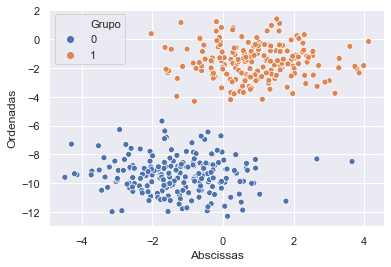

In [8]:
# Separando os grupos por cor, plota os pontos.
sns.scatterplot(X["Abscissas"], X["Ordenadas"], hue=y["Grupo"])

Aqui também podemos verificar visualmente que a separação linear é possível e, portanto, podemos esperar que nosso *perceptron* chegue a um ponto que não mais erre (i.e., encontre uma reta que sozinha separe corretamente os dois grupos).

### Modelo

Tudo pronto, agora vamos criar e treinar nosso *perceptron*.

In [9]:
from sklearn.model_selection import train_test_split # Função que usaremos para separar base de teste e de treino.
from sklearn.linear_model import Perceptron          # Modelo de classificação e regressão perceptron.
from sklearn.metrics import accuracy_score           # Função que usaremos para mensurar a precisão do modelo.

A partir de agora não temos nada muito novo se você já implementou outros modelos, vamos então dividir nosso *dataset* em 70% treino e 30% teste.

In [10]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=2) # Separa a base de treino e de teste.

Para o *perceptron* em si não nos preocuparemos em alterar e explicar os parâmetros, afinal a [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) é mais do que suficiente, de qualquer forma, mais adiante levantaremos alguns pontos pertinentes.

In [11]:
perceptron = Perceptron(random_state=2)     # Inicializa o modelo.
perceptron.fit(X_treino, y_treino["Grupo"]) # Treina o modelo: com base nas coordenadas dos pontos conhecidos, separa-os em Grupo 0 ou Grupo 1.
y_previsto = perceptron.predict(X_teste)    # Realiza a previsão: sem acesso a quais grupos pertencem os pontos, classifica-os em Grupo 0 ou Grupo 1.

print("Porcentagem de acertos:", "{0:.2f}%".format(accuracy_score(y_teste, y_previsto)*100)) # Imprime a porcentagem de acertos do modelo.

Porcentagem de acertos: 100.00%


Tal como haviamos comentado, a previsão perfeita dos dados se deve a dois fatores: uma base de treino suficientemente grande e, sumariamente, existir a possibilidade de separação linear dos dados.

***
**Observação:** o *bias* e os pesos são inicializados automaticamente quando utilizamos o modelo diretamente dessa biblioteca, não sendo necessário nenhum procedimento extra (e.g. definir um "*input* zero" para o *bias* ser determinado).
***

#### Adendo

Uma construção interessante, principalmente no caso bidimensional, é exibir a *decision boundary* em um gráfico. Existem algumas formas de se fazer isso e, em virtude da facilidade e eficácia, utilizaremos a biblioteca [MLxtend](http://rasbt.github.io/mlxtend/) — *Machine Learning Extensions*. Talvez seja necessário instalar o pacote a ela referente, para isso, utilize um terminal ou, se desejar, execute `%pip install mlxtend` na célula abaixo (`%pip install` é uma função mágica utilizada para instalar pacotes na instância atual do *kernel*).

In [12]:
# %pip install mlxtend

Caso não deseje pacotes adicionais, existem [alternativas](https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron) um pouco mais trabalhosas, mas que demandam somente as "bibliotecas fundamentais". Continuando, importaremos a função `plot_decision_regions()` para visualizar a fronteira de decisão:

In [13]:
from mlxtend.plotting import plot_decision_regions

Agora, basta indicar: 

* `X` (*features*) e `y` (*targets*) como *ndarrays*;
* o modelo ao qual aplicamos os métodos `fit()` e `predict()`, através do parâmetro `clf`.

Veja:

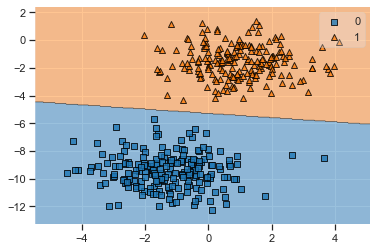

In [14]:
plot_decision_regions(np.array(X), np.array(y["Grupo"]), clf=perceptron)

Por último, verifique a [documentação](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions) tanto para aprimorar a visualização do gráfico, quanto para adequar a função as suas necessidades. Para fins estéticos, há abaixo uma customização do plot anterior.

Text(0, 0.5, 'Ordenadas')

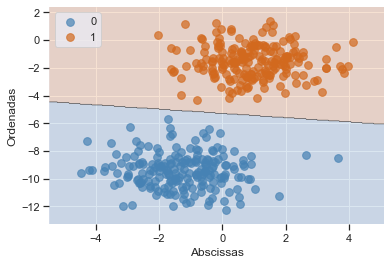

In [15]:
# Define dois dicionários com as propriedades dos marcadores e das regiões, respectivamente.
markers = dict(s=60, edgecolor=None, alpha=0.7) # Marcadores de tamanho 60, sem contorno e com transparência.
regions = dict(alpha=0.2)                       # Regiões delimitadas pela fronteira de decisão com 20% de opacidade.

# As cores são passadas como uma única string e separadas por vírgulas.
plot_decision_regions(np.array(X), np.array(y["Grupo"]), clf=perceptron,
                      markers="o", colors="steelblue,chocolate", 
                      scatter_kwargs = markers, contourf_kwargs = regions)

plt.legend()            # Exibe a legenda no canto superior direito (padrão).
plt.xlabel("Abscissas") # Legenda do eixo x.
plt.ylabel("Ordenadas") # Legenda do eixo y.

## Uma atualização importante

Embora não tenhamos explicitado isso, o modelo do *perceptron* que trabalhamos até agora é bem semelhante ao que fora proposto por Frank Rosenblatt, em 1962. No livro *Principles of Neurodynamics*, o psicólogo estadunidense introduziu o que é considerado um aprimoramento do hoje chamado [*MCP Neuron*](https://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf) (*McCulloch-Pitts Neuron*) — um modelo que, assim como o *perceptron*, buscava imitar de forma simplista o funcionamento de um neurônio. Contudo, décadas após, passamos por mudanças significativas e, atualmente, o algoritmo se encontra ainda mais eficiente. Para trabalhar a diferença crucial, vamos retomar a função limiar que o *perceptron* original possui:

$f(u) = \begin{cases} 1,\ \ \ \ se\ \ u > T \\
                      0,\ \ \ \ se\ \ u \leq T \end{cases};\ \forall u \in \mathbb{R}$

Embora não tenhamos citado anteriormente, levando em conta o algoritmo, temos que essa função é uma **função de ativação** e que o valor por ela recebido (a soma do *bias* com a soma ponderada) é denominado **ativação**. Dessa forma, quando um *perceptron* retorna 1, dizemos que ele foi ativado; do contrário, não. Sintetizando, enxergamos dois casos possíveis:

> **1.** A ativação supera o limiar zero, portanto, o *perceptron* é ativado.

> **2.** A ativação fica abaixo do (ou é igual ao) limiar zero, portanto, o *perceptron* não é ativado.

Mas agora, conhecendo a nomenclatura adequada, podemos dizer que o aprimoramento reside, justamente, na função de ativação: ao invés de utilizarmos uma função limiar (como proposto no modelo de 1962), utilizamos qualquer função que retorne um valor desejado — por exemplo, um número pertencente ao intervalo $]0,1[$. Vejamos isso graficamente:

<img align="left" width="600" src="https://i.ibb.co/wyKk6rK/Gr-ficos2.png">

**f** é nossa função limiar com saída binária, enquanto **g** é a função sigmóide. De imediato, perceba que a mudança da função acarretará uma mudança das possíveis saídas, isto é, não estamos mais limitados ao caso simplista "**0** ou **1**", na verdade, para essa nova função temos infinitos valores entre os dois números. Felizmente, a Wikipedia compila uma [tabela de funções de ativação](https://en.wikipedia.org/wiki/Activation_function#Comparison_of_activation_functions), com formulação algébrica, visualização gráfica e intervalos contemplados, mas por hora, é bom sabermos que sigmóide, arco tangente e ReLU costumam ser as mais famosas.

***
**Observações:** dado que algumas dúvidas quanto à nomenclatura podem começar a surgir é, de fato, bom ressaltar certos conceitos.

* O termo "*perceptron*", quando utilizado isoladamente, costuma se referir ao modelo original, pois em geral explicitamos a função de ativação quando ela é diferente da limiar.

* Usualmente, dizemos que as redes neurais são compostas por *neurons* (neurônios, em português) ou *nodes*. Isso não implica estarmos nos referindo ao modelo original do *neuron* (*MCP Neuron*), na verdade, as "células" que compõem as redes neurais artificiais são até mesmo mais sofisticadas do que os *perceptrons*, na enorme maioria dos casos.
***
![Alt text](https://gistcdn.githack.com/Gbecdox/178a8d0cd024d5e52d63e3c11a2cdfd7/raw/3f32b8a31509ec3b2b20ebb202113b2da0e9c751/FooterGM.svg)
***